<h1><center>Python Pandas Exercises and Techniques</h1></center>

<b>Purpose:</b> This living document is meant to service as a learning tool.

## Loading and viewing a dataset
First we use pd.read() on the dataset we wish to work with. In this case the dataset is a csv file so we use pd.read_csv().

Next we use head() and tail() to get a quick glimpse of what we're working with and to verify that we did indeed successfully read the dataset. 

In [1]:
import pandas as pd
import numpy as np

# Load data into pandas dataframe
pd.set_option('display.width', 480)
pd.set_option("display.max_columns", 20)
df_le = pd.read_csv('Life_Expectancy_WHO_Data.csv')

# Print the first three records using head()
print("head(): \n", df_le.head(3))

# Print the last three records using tail()
print("df_le.tail(5): \n", df_le.tail(3))

head(): 
         Country  Year      Status  Life_Expectancy  Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Expenditure  Hepatitis B  Measles   ...  Polio  Total_Expenditure  Diphtheria    HIV/AIDS         GDP  Population  Thinness_1-19_Years  Thinness_5-9_Years  Income_Composition_Of_Resources  Schooling
0         Haiti  2010  Developing             36.3              682             23     5.76               36.292918          NaN         0  ...   66.0               8.90         66.0        1.9  662.279518   9999617.0                  4.0                 4.0                            0.470        8.6
1  Sierra Leone  2000  Developing             39.0              533             29     3.97               20.395683          NaN      3575  ...   46.0              13.63         44.0        1.2  139.314773   4564297.0                  1.3                 1.4                            0.292        6.7
2  Sierra Leone  2001  Developing             41.0              519             3

If the first row in the dataset contains a lebl you wish to leave out, add "index_col = 0" to the read - "df_le = pd.read_csv('Life_Expectancy_WHO_Data.csv' index_col = 0")

Next we might want to view the shape and data types this dataset contains. "\n" has been used to add spaces between each method to make it easier to read.

In [2]:
# List of numerical features
feature_vars = list(df_le.columns)[3:]  

# Print the column headings/features of the dataframe
print(feature_vars) 
print("\n")

# View the dataframe
print("shape(): \n", df_le.shape)
print("\n")
print("dtypes(): \n", df_le.dtypes)
print("\n")

['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'Under-Five_Deaths ', 'Polio', 'Total_Expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'Thinness_1-19_Years', 'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling']


shape(): 
 (2928, 22)


dtypes(): 
 Country                             object
Year                                 int64
Status                              object
Life_Expectancy                    float64
Adult_Mortality                      int64
Infant_Deaths                        int64
Alcohol                            float64
Percentage_Expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
Under-Five_Deaths                    int64
Polio                              float64
Total_Expenditure                  float64
Diphtheria                         fl

#### Replacing column headings
As we saw from the initial quick look of the data, the string values for the column headings are fairly messy so we need to address this first. In the code below the spaces are replaced with underscores and shortened some of the text. 

In [3]:
global df_le, feature_vars
orig_column_heads = list(df_le.columns)
new_column_heads = []

# Replace spaces with underscores and "title" capitalize text
for col in orig_column_heads:  
    new_column_heads.append(col.strip().title().replace('  ', ' ').replace(' ', '_'))
df_le.columns = new_column_heads

# Rename column heads to properly reflect meaning
df_le.rename(columns={'Thinness_1-19_Years': 'Thinness_10-19_Years'}, inplace=True)
df_le.rename(columns={'Percentage_Expenditure': 'Pct_Expenditure'}, inplace=True)
df_le.rename(columns={'Total_Expenditure': 'Ttl_Expend'}, inplace=True)
df_le.rename(columns={'Bmi': 'BMI'}, inplace=True)
df_le.rename(columns={'Gdp': 'GDP'}, inplace=True)
df_le.rename(columns={'Hiv/Aids': 'HIV_AIDS'}, inplace=True)
df_le.rename(columns={'Income_Composition_Of_Resources': 'Income_Comp_Of_Resources'}, inplace=True)
feature_vars = list(df_le.columns)[3:]

# Print the column headings/features of the dataframe
print(feature_vars) 

['Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Pct_Expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'Under-Five_Deaths', 'Polio', 'Ttl_Expend', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'Thinness_10-19_Years', 'Thinness_5-9_Years', 'Income_Comp_Of_Resources', 'Schooling']


The new headings look much better and will make coding this project much easier and more readable!

#### Dataframe from dictionary
Creating a Pandas dataframe from a dictionary is easy. Just assign the dictionary name using pd.dataframe. In the example below we also add an index to the dataframe.

In [4]:
import pandas as pd

# Create a dictionary
country_dict = {
    "country":["Brazil", "Russia", "India", "China", "South Africa"],
    "capital":["Brasilia", "Moscow", "New Delhi", "Beijing", "Pretoria"],
    "area":[516, 17.10, 3.286, 9.597, 1.221],
    "population": [200.4, 143.5, 1252, 1357, 52.98] 
    }

# Convert dictionary to Pandas dataframe.
brics = pd.DataFrame(country_dict)

# Add index to the dataframe
brics.index = ["BR", "RU", "IN", "CH", "SA"]
brics

,country,capital,area,population
BR,Brazil,Brasilia,516.000,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


## Querying Dataframes


### Filtering data with Pandas
We often have the need to filter the results of a dataframe wither to make it more manageable or to simply only return the colums we need.  Pandas makes this process easy.  

First we read the file, and in this case I use head() to quickly view the first four results.

In [5]:
import pandas as pd

# Import the bird strike dataset
df_bird_strikes = pd. read_excel('Bird_Strikes.xlsx')
df_bird_strikes.head(4)

,Record ID,Aircraft: Type,Airport,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes


Next we'll filter the original dataframe results to only include flight leaving Denver International Airport that caused damage.

In [6]:
df_bird_strikes_denver = df_bird_strikes.query('Airport == "DENVER INTL AIRPORT" and Effect == "Caused damage"')
df_bird_strikes_denver.head(4)

,Record ID,Aircraft: Type,Airport,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
256,206943,Airplane,DENVER INTL AIRPORT,< 1000 ft,B-737-300,2 to 10,10,None,2001-02-27,Caused damage,...,False,"FORM WAS TORN, COULD NOT READ PHASE OR EFFECT.",Large,Some Cloud,Canada goose,N,0,300.0,0,Yes
393,209172,Airplane,DENVER INTL AIRPORT,< 1000 ft,B-757-200,2 to 10,2,None,2001-09-22,Caused damage,...,False,NO DMG OTHER THAN BLOOD STAINS AND CHIPPED PAINT.,Small,No Cloud,European starling,Y,0,300.0,0,Yes
726,219466,Airplane,DENVER INTL AIRPORT,< 1000 ft,BE-1900,2 to 10,7,None,2002-10-31,Caused damage,...,False,ARPT OPS & WS BIOLOGIST WERE NOT MADE AWARE OF...,Large,Overcast,Canada goose,N,0,200.0,0,No
1982,244442,Airplane,DENVER INTL AIRPORT,< 1000 ft,CL-RJ700,2 to 10,7,None,2006-11-10,Caused damage,...,False,FLAPS ON L WING DAMAGED.,Medium,No Cloud,Unknown bird - medium,N,0,900.0,0,No


We may also have the need to group this data by a certain column, for instance the airline. We can use value_counts() for this.

In [7]:
df_bird_strikes.query('Airport == "DENVER INTL AIRPORT" and Effect == "Caused damage"') \
    ['Airline'].value_counts()

FRONTIER AIRLINES       12
GREAT LAKES AIRLINES     5
SOUTHWEST AIRLINES       5
SKYWEST AIRLINES         2
DELTA AIR LINES          1
UNITED AIRLINES          1
US AIRWAYS               1
Name: Airline, dtype: int64

## Using Pandas Merging to joining two dataframes.
In the first dataframe the customer has a unique customer_id. The purchasesdataframe also has the customer_id.


In [8]:
import pandas as pd

# Create Pandas dataframe
customers = pd.DataFrame(
    {
        "customer_id": ["A", "B", "C", "D"],
        "name": ["Bob", "Dave", "Janet", "Barabara"]
    }
)

# Create Pandas dataframe
purchases = pd.DataFrame(
    {
        "customer_id": ["B", "A", "C", "E", "F"],
        "item": ["pizza", "sushi",
        "coney dogs", "steak", "potatoes"],
        "price": [100, 200, 110, 230, 500],
    }
)


We can use pd.merge() to combine dataframes on any common columns, in this case we can use the customer_id. In this first example we use "how=left" to keep everything from the left dataframe - a left join.  
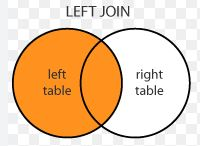

In [9]:
# Merge the two Pandas dataframes using left join
merged_df = pd.merge(customers, purchases, how="left")
merged_df.head(4)

,customer_id,name,item,price
0,A,Bob,sushi,200.0
1,B,Dave,pizza,100.0
2,C,Janet,coney dogs,110.0
3,D,Barabara,NaN,NaN


In this next example we use "how=right" to keep everything from the right df - a right join.  
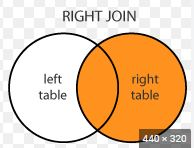

In [10]:
#merged_df = purchases.merge(customers, how="right")
merged_df = pd.merge(customers, purchases, how="left")
merged_df.head(4)

,customer_id,name,item,price
0,A,Bob,sushi,200.0
1,B,Dave,pizza,100.0
2,C,Janet,coney dogs,110.0
3,D,Barabara,NaN,NaN


Another way to do it is to just call "merge" on any dataframe.

In [11]:
import pandas as pd

# Create Pandas dataframe
customers = pd.DataFrame(
    {
        "customer_id": ["A", "B", "C", "D"],
        "name": ["Bob", "Dave", "Janet", "Barabara"]
    }
)

# Create Pandas dataframe
purchases = pd.DataFrame(
    {
        "customer_id": ["B", "A", "C", "E", "F"],
        "item": ["pizza", "sushi",
        "coney dogs", "steak", "potatoes"],
        "price": [100, 200, 110, 230, 500],
    }
)

# Left join merge 
merged_df = pd.merge(customers, purchases, how="left")
merged_df = customers.merge(purchases, how="left")
merged_df.head(4)

,customer_id,name,item,price
0,A,Bob,sushi,200.0
1,B,Dave,pizza,100.0
2,C,Janet,coney dogs,110.0
3,D,Barabara,NaN,NaN


## Creating a new columns in your dataframe
We can use Pandas to add columns to a dataframe.

In [12]:
# Importing pandas library
import pandas as pd
 
# Creating and initializing a nested list
students = [['Scott', 45, 'Centennial', 'US'],
            ['Christy', 44, 'Greenwood Village', 'US'],
            ['Michael', 31, 'Denver', 'US'],
            ['Dan', 28, 'Arvada', 'US'],
            ['Christopher', 24, 'Denver', 'US'],
            ['Robert', 32, 'Littleton', 'US']]
 
# Create a DataFrame object
df_students = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country'],
                  index=['a', 'b', 'c', 'd', 'e', 'f'])

# Using dataframe.assign() function
df_students = df_students.assign(Grade=[100,94.9,84.3,92,88.7,33.5],
               Gender=['M','F','M','M','M','M'])
             
# Displaying the Data frame
df_students    

,Name,Age,City,Country,Grade,Gender
a,Scott,45,Centennial,US,100.0,M
b,Christy,44,Greenwood Village,US,94.9,F
c,Michael,31,Denver,US,84.3,M
d,Dan,28,Arvada,US,92.0,M
e,Christopher,24,Denver,US,88.7,M
f,Robert,32,Littleton,US,33.5,M


We can also use dataframe.assign() to create the new columns.

In [13]:
# Importing pandas library
import pandas as pd
 
# Creating and initializing a nested list
students = [['Scott', 45, 'Centennial', 'US'],
            ['Christy', 44, 'Greenwood Village', 'US'],
            ['Michael', 31, 'Denver', 'US'],
            ['Chad', 28, 'Arvada', 'US'],
            ['Christopher', 24, 'Denver', 'US'],
            ['Ned', 32, 'Littleton', 'US']]
 
# Create a DataFrame object
df_students = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country'],
                  index=['a', 'b', 'c', 'd', 'e', 'f'])

# Using dataframe.assign() function
df_students = df_students.assign(Grade=[100,94.9,84.3,92,88.7,33.5],
               Gender=['M','F','M','M','M','M'])
 
# Displaying the Data frame
df_students

,Name,Age,City,Country,Grade,Gender
a,Scott,45,Centennial,US,100.0,M
b,Christy,44,Greenwood Village,US,94.9,F
c,Michael,31,Denver,US,84.3,M
d,Chad,28,Arvada,US,92.0,M
e,Christopher,24,Denver,US,88.7,M
f,Ned,32,Littleton,US,33.5,M


#### Assigning a list to the dictionary index
A list of index columns can be added using .index.

In [14]:
import pandas as pd

# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)
print(cars)

# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45
           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


### Column Access
By using 'index_col = 0'the column headings are displayed

In [15]:
import pandas as pd

#Read csv with pandas
brics = pd.read_csv("country_capitals.csv", index_col = 0)
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,1.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98
GR,Germany,Berlin,4.120,84.50


The square brackets are used to select.  Here the country is selected.

In [16]:
brics["country"]

BR          Brazil
RU          Russia
IN           India
CH          China 
SA    South Africa
GR         Germany
Name: country, dtype: object

Notice how the dtype is an object. If we use double square brackets and check the type we see that it's a <b>sub dataframe</b>. Also, by adding two or more items it's esentially like adding a list.

In [17]:
type(brics[["country", "capital"]])

pandas.core.frame.DataFrame

Another way to do this is to use a <b>slice</b>.  Here the first three rows are selected.

In [18]:
brics[1:4]

,country,capital,area,population
RU,Russia,Moscow,1.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


Square brackets are limited. Ideally we may want a 2D Numpy array. my_array[rows, columns].  'loc' is label-based, 'iloc' in integer based.

In [19]:
brics.loc["RU"]

country       Russia
capital       Moscow
area             1.1
population     143.5
Name: RU, dtype: object

To get a dataframe, we have to put and "RU" string inside another pair of brackets.

In [20]:
brics.loc[["RU"]]

,country,capital,area,population
RU,Russia,Moscow,1.1,143.5


Using a comma seperate list with .loc will select those rows specified.

In [21]:
brics.loc[["RU", "IN", "CH"]]

,country,capital,area,population
RU,Russia,Moscow,1.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


The columns can also be selected with .loc.

In [22]:
brics.loc[["RU", "IN", "CH"], ["country", "capital"]]

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


Just selecting specific coulmns will then then display all rows. Or just use a colon.

In [23]:
brics.loc[:, ["country", "capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria
GR,Germany,Berlin


Access rows with slicing

In [24]:
# Print out first 3 observations
print(brics[0:3])

# Print out third, fourth and fifth observation
print(brics[2:6])

   country    capital   area  population
BR  Brazil   Brasilia  8.516       200.4
RU  Russia     Moscow  1.100       143.5
IN   India  New Delhi  3.286      1252.0
         country    capital   area  population
IN         India  New Delhi  3.286     1252.00
CH        China     Beijing  9.597     1357.00
SA  South Africa   Pretoria  1.221       52.98
GR       Germany     Berlin  4.120       84.50


### loc and iloc
With loc and iloc you can do practically any data selection operation on DataFrames you can think of. loc is label-based, which means that you have to specify rows and columns based on their row and column labels. iloc is integer index based, so you have to specify rows and columns by their integer index like you did in the previous exercise.

In [25]:
import pandas as pd

# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)

# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

# Print out drives_right value of Japan
print(cars.loc[["JPN"]])

# Print sub-DataFrame
print(cars.loc[['AUS', 'EG']])

# Print out cars_per_cap and drives_right as DataFrame
print(cars.loc[:, ['drives_right', 'cars_per_cap']])

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45
    country  drives_right  cars_per_cap
JPN   Japan         False           588
       country  drives_right  cars_per_cap
AUS  Australia         False           731
EG       Egypt          True            45
     drives_right  cars_per_cap
US           True           809
AUS         False           731
JPN         False           588
IN          False            18
RU           True           200
MOR          True            70
EG           True            45


### Filtering pandas dataframes

In [26]:
import pandas as pd

# Read csv with pandas
brics = pd.read_csv("country_capitals.csv", index_col = 0)

# Get area with pandas series
area = brics["area"]
# Alternate methods
#area = brics.loc[:,"area"]
#area = brics.iloc[:,2]
print(area)

brics

BR    8.516
RU    1.100
IN    3.286
CH    9.597
SA    1.221
GR    4.120
Name: area, dtype: float64


,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,1.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98
GR,Germany,Berlin,4.120,84.50


We can then use a boolean operator.

In [27]:
brics["area"] > 8

BR     True
RU    False
IN    False
CH     True
SA    False
GR    False
Name: area, dtype: bool

Now we assign the same filter to a variable named "is_huge" to index the results.

In [28]:
is_huge = brics["area"] > 8
brics[is_huge]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


Or we can just consolidate it to one line.

In [29]:
brics[brics["area"] > 8]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


Next we create aboolean series to get a subset of brics.

In [30]:
brics[np.logical_and(brics["area"] > 8, brics["area"] < 10)]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


Using the cars dataset, we extraccts a coumn as a series and then create a subset.

In [2]:
# Import cars data
import pandas as pd

# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)

# Extract drives_right column as Series: dr
dr = cars['drives_right']

# Use dr to subset cars: sel
sel = cars[dr]

# Print sel
print(sel)

         country  drives_right  cars_per_cap
0  United States          True           809
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


We can combine the last three lines of code into one line.

In [3]:
# Import cars data
import pandas as pd

# Build cars DataFrame
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)

# Extract drives_right column as Series and print
print(cars[cars['drives_right']])


         country  drives_right  cars_per_cap
0  United States          True           809
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45
